<h1 style="color:gray;font-family:segoe ui">BAYESIAN CLASSIFIER WITH SINGLE GAUSSIAN PER CLASS - MNIST DATA</h1>
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 800)

%matplotlib inline

<h1 style="color:gray;font-family:segoe ui">Loading the csv's for each digit into one single dataframe</h1>

In [4]:
train = pd.DataFrame(columns=['V'+str(i) for i in range(1,785)]+['label'])
for i in range(10):
    temp = pd.read_csv(f"MNIST/train{i}.csv")
    temp = temp.iloc[:,1:]
    temp['label'] = i
    train = pd.concat([train,temp])
    print(i,end=" ")
display(train.shape)
train.head()

0 1 2 3 4 5 6 7 8 9 

(36433, 785)

V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21  \
0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
1  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
2  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
3  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
4  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   

  V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

  V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

  V60 V61 V62 V63 V64 V65 V66 V67 V68 V69 V70 V71 V72 V73 V74 V75 V76 V77 V78  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

  V79 V80 V81 V82 V83 V84 V85 V86 V87 V88 V89 V90 V91 V92 V93 V94 V95 V96 V97  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

  V98 V99 V100 V101 V102 V103 V104 V105 V106 V107 V108 V109 V110 V111 V112  \
0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0   

  V113 V114 V115 V116 V117 V118 V119 V120 V121 V122 V123 V124 V125 V126 V127  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

  V128 V129 V130 V131 V132 V133 V134 V135 V136 V137 V138 V139 V140 V141 V142  \
0   51  159  253  159   50    0    0    0    0    0    0    0    0    0    0   
1    0    0   64  253  255   63    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

  V143 V144 V145 V146 V147 V148 V149 V150 V151 V152 V153 V154 V155 V156 V157  \
0    0    0    0    0    0    0    0    0    0    0    0    0 

<h1 style="color:gray;font-family:segoe ui">Drop NA values</h1>
<hr>

In [5]:
train.dropna(inplace=True)
train.reset_index(inplace=True,drop=True)
train.shape

(36051, 785)

In [6]:
train = train.apply(pd.to_numeric)

<h1 style="color:gray;font-family:segoe ui">Drop columns that are all zeros</h1>

In [7]:
non_zero_cols = list(filter(lambda x: train[x].sum() > 0,train.columns))

In [9]:
train = train[non_zero_cols]
train.shape

(36051, 709)

<h1 style="color:gray;font-family:segoe ui">Drop columns columns where covariance > 0.97, as it creates singular eigenvalue matrices and messes up LDA calculation</h1>

In [10]:
corr_matrix = train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.97)]

In [11]:
train.drop(columns=to_drop,inplace=True)
train.reset_index(inplace=True,drop=True)

In [12]:
train.shape

(36051, 702)

In [13]:
from sklearn.decomposition import PCA

In [71]:
pca = PCA(n_components=9)
pca.fit(train.iloc[:,:-1])

xPCA = pca.fit_transform(train.iloc[:,:-1])
xPCA.shape

(36051, 9)

In [15]:
cm = plt.get_cmap('gist_rainbow')
colors = [cm(i/9) for i in range(10)]

<h1 style="color:gray;font-family:segoe ui">Plotting the digits against each pair of the 9 components of PCA.</h1>

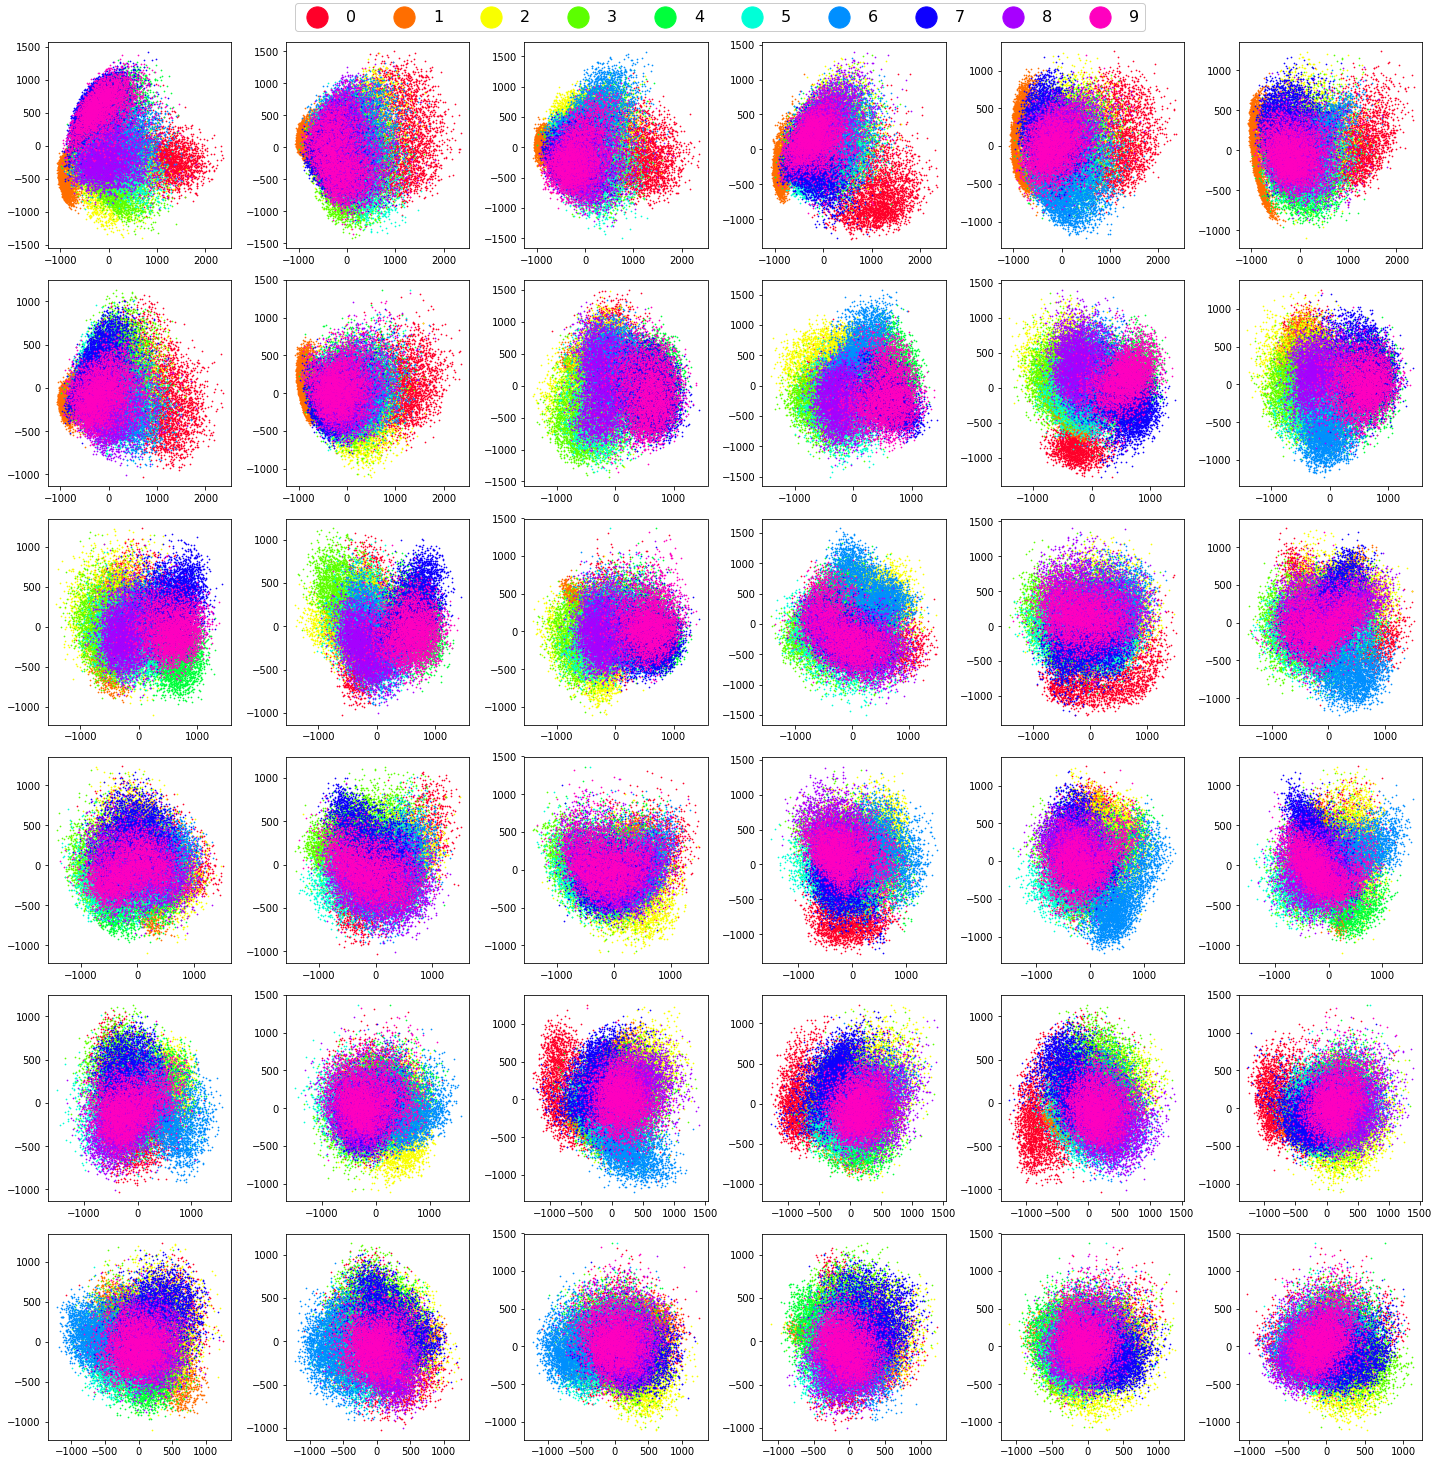

In [16]:
fig, axes = plt.subplots(nrows=6,ncols=6,figsize=(20,20))
flats = axes.flatten()
counter = 0
for i in range(8):
    for j in range(i+1,9):
        tempDF = pd.DataFrame({'label':train['label'],
                                'first':list(map(lambda x: x[i],xPCA)),
                                'second':list(map(lambda x: x[j],xPCA))})
        for lab in tempDF.label.unique():
            temp = tempDF[tempDF['label'] == lab]
            flats[counter].scatter(temp['first'],temp['second'],c=colors[lab],label=lab,s=0.5,alpha=1)
        counter += 1

handles, labels = flats[2].get_legend_handles_labels()
fig.legend(handles, labels, ncol=10, loc='upper center', bbox_to_anchor=(0.5, 1.02),
           prop={'size':16}, markerscale=30, framealpha=1)

fig.tight_layout()

<h1 style="color:gray;font-family:segoe ui">As expected, PCA finds axes that capture most variation. It doesn't necessarily find the axes that separate the classes, as is evident from the plots above.</h1>

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [72]:
clf = LinearDiscriminantAnalysis(solver='eigen',n_components=9)
xLDA = clf.fit(train.iloc[:,:-1],train['label']).transform(train.iloc[:,:-1])

In [19]:
xLDA.shape

(36051, 9)

<h1 style="color:gray;font-family:segoe ui">Plotting the digits against each pair out of the 9 components of LDA. Here we expect to be able to visualize classes separated out.</h1>

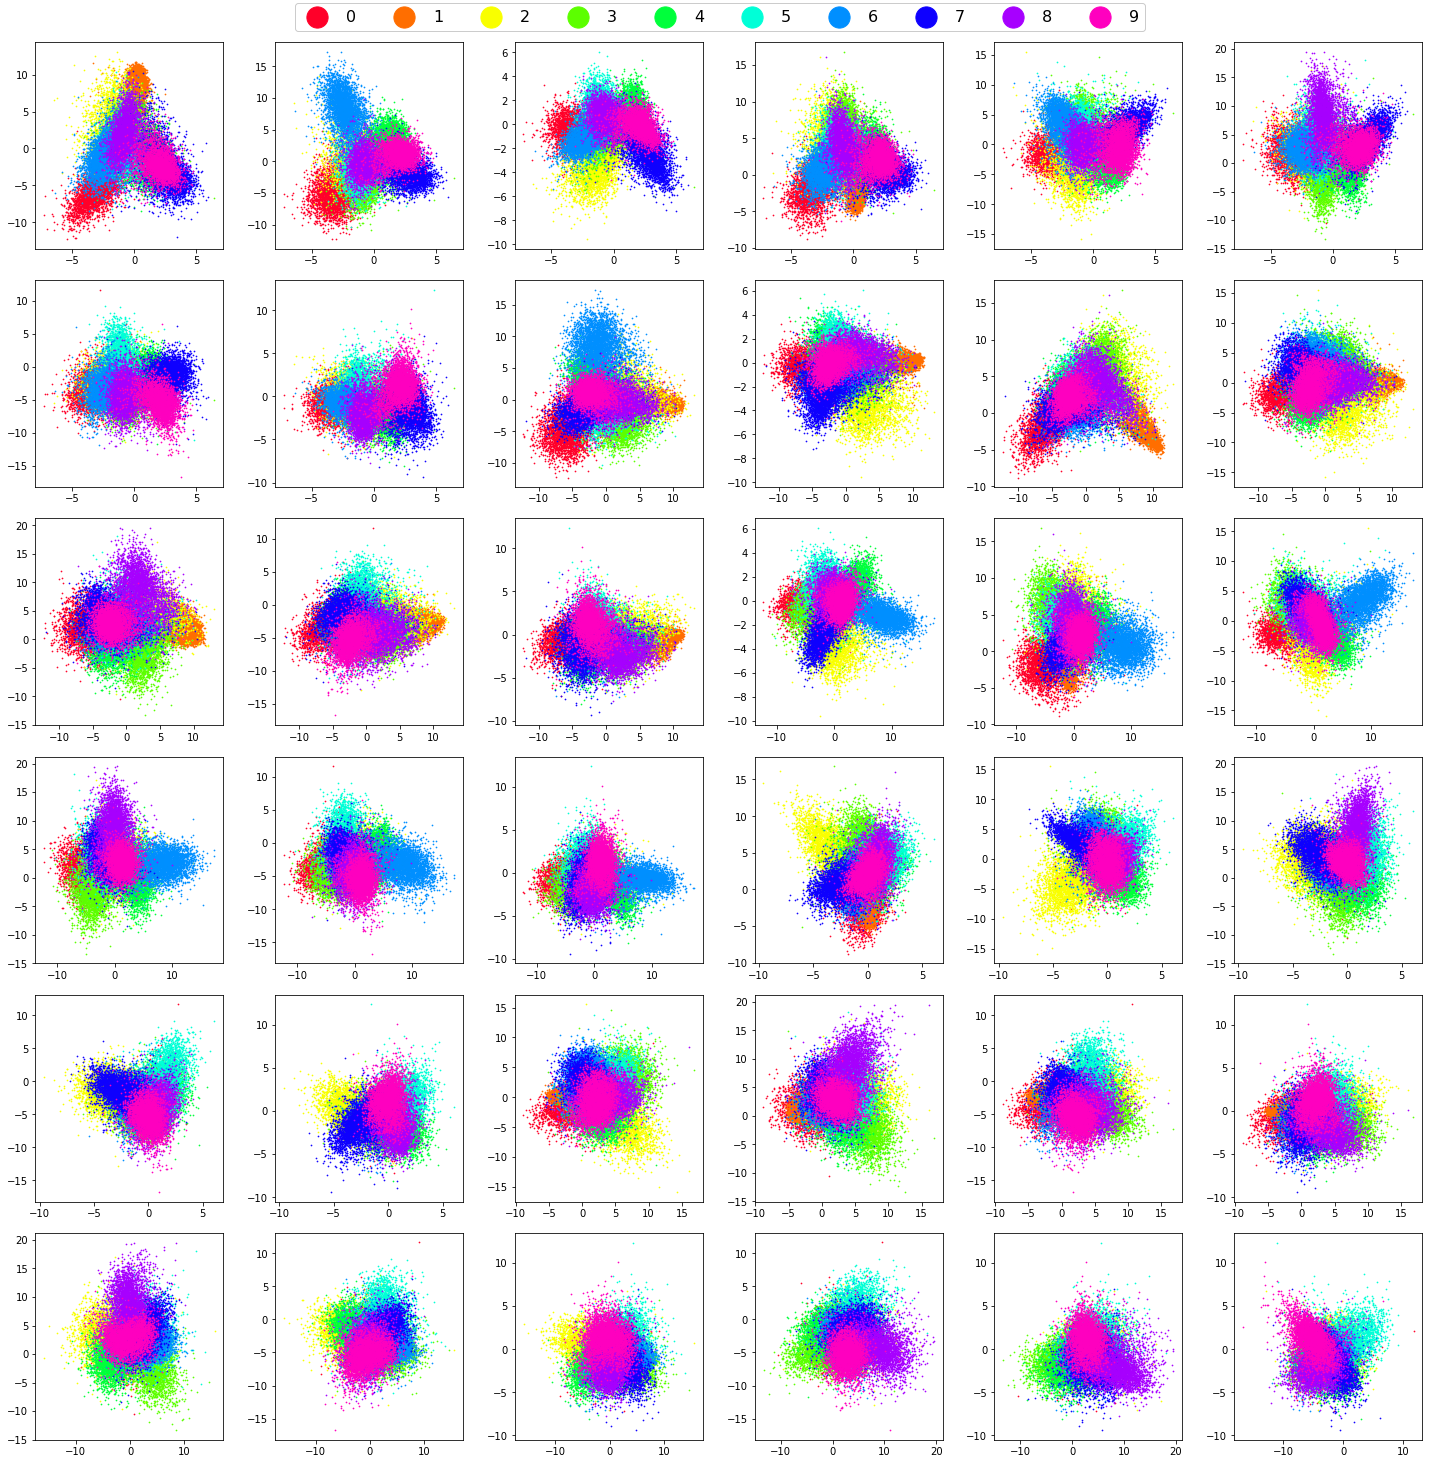

In [20]:
fig, axes = plt.subplots(nrows=6,ncols=6,figsize=(20,20))
flats = axes.flatten()
counter = 0
for i in range(8):
    for j in range(i+1,9):
        tempDF = pd.DataFrame({'label':train['label'],
                                'first':list(map(lambda x: x[i],xLDA)),
                                'second':list(map(lambda x: x[j],xLDA))})
        for k,lab in enumerate(tempDF.label.unique()):
            temp = tempDF[tempDF['label'] == lab]
            flats[counter].scatter(temp['first'],temp['second'],c=colors[k],label=lab,s=0.5,alpha=1,edgecolor=None)
        counter += 1

handles, labels = flats[2].get_legend_handles_labels()
fig.legend(handles, labels, ncol=10, loc='upper center', bbox_to_anchor=(0.5, 1.02),
           prop={'size':16}, markerscale=30, framealpha=1)

#flats[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=10, fontsize='large', fancybox=True, shadow=True)
fig.tight_layout()

<h1 style="color:gray;font-family:segoe ui">Comparison of how the best two components of LDA and PCA picture digits 1 and 8.</h1>

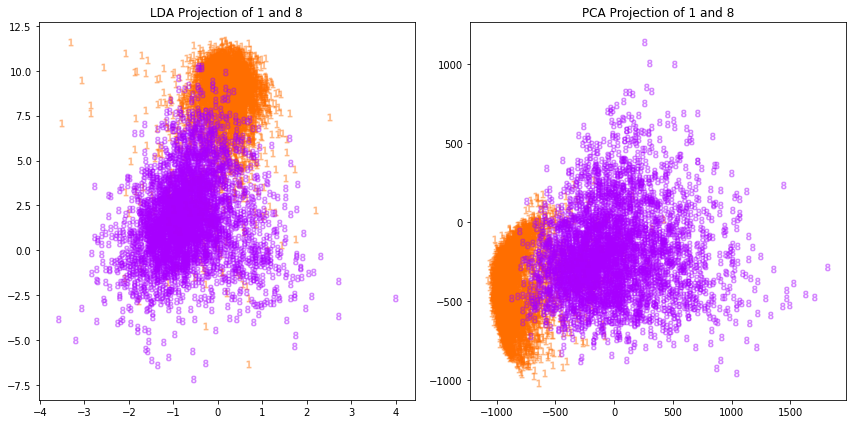

In [21]:
fig, axes = plt.subplots(ncols=2,figsize=(12,6))

tempDF = pd.DataFrame({'label':train['label'],
                        'firstLDA':list(map(lambda x: x[0],xLDA)),
                        'secondLDA':list(map(lambda x: x[1],xLDA)),
                        'firstPCA':list(map(lambda x: x[0],xPCA)),
                        'secondPCA':list(map(lambda x: x[1],xPCA))})
#t = 0
#for lab in tempDF.label.unique():
for lab in [1,8]:
    temp = tempDF[tempDF['label'] == lab]
    temp = tempDF[tempDF['label'] == lab]
    axes[0].scatter(temp['firstLDA'],temp['secondLDA'],c=colors[lab],label=lab,s=50,marker=f'${lab}$',alpha=0.3,edgecolor=None)
    axes[0].set_title("LDA Projection of 1 and 8")
for lab in [1,8]:
    temp = tempDF[tempDF['label'] == lab]
    temp = tempDF[tempDF['label'] == lab]
    axes[1].scatter(temp['firstPCA'],temp['secondPCA'],c=colors[lab],label=lab,s=50,marker=f'${lab}$',alpha=0.3,edgecolor=None)
    axes[1].set_title("PCA Projection of 1 and 8")

fig.tight_layout()

In [22]:
xPCA.shape

(36051, 9)

<p style="color:gray;font-size:18px;font-family:segoe ui">Let's generate the Gaussian parameters for each class and build the Discriminant function.</p>
<hr>
<p style="color:gray;font-size:18px;font-family:segoe ui">Below function calculates and returns a list of length 9, for `mean`, `variance-covariance` matrix and `inverse-variance-covariance` matrix for 9 dimensions of PCA/LDA. Each item in the respective list contains the classwise mean, sigma and sigma-inv that will be used to calculate the Discriminant function later.</p>

In [34]:
def get_mu_sigmas_inv(df,label_df):
    muList = []
    sigmaList = []
    invSigmaList = []

    for i in range(10): # because 10 classes: 0,1,2,3,4,5,6,7,8,9 digits
        ixs = label_df[label_df.label == i].index

        mu = df[ixs].mean(axis=0) # mu is a vector of length 9, since we have 9 PCA/LDA dimensions
        muList.append(mu)

        bigSigma = np.cov(df[ixs].T) # Matrix of dim 9x9, it represents the variance-covariance matrix of the 9 PCA/LDA dims
        sigmaList.append(bigSigma) # Inverse of the matrix above, also 9x9

        invSigmaList.append(np.linalg.inv(bigSigma))
    return muList,sigmaList,invSigmaList

In [35]:
muListPCA, sigmaListPCA, invSigmaListPCA = get_mu_sigmas_inv(xPCA,train)

<h1 style="color:gray;font-family:segoe ui">Get class priors.</h1>

In [24]:
priors = train.groupby(['label'])['label'].count()/train.shape[0]

<h1 style="color:gray;font-family:segoe ui">The actual formula that gives us log probability, log(P(class i and input j)), for a given input vector and label class.</h1>

In [25]:
def calc_discriminant(i,row,muList,sigmaList,invSigmaList,priors):
    return -0.5*(row-muList[i]).dot(invSigmaList[i]).T.dot(row-muList[i])-0.5*np.log(np.linalg.det(sigmaList[i]))+np.log(priors[i])

<h1 style="color:gray;font-family:segoe ui">This method predicts the label for given input data.</h1>

In [36]:
def predict(X,muList,sigmaList,invSigmaList,priors):
    train_predictions = []
    for i,row in enumerate(X):
        temp = list(map(lambda x: calc_discriminant(x,row,muList,sigmaList,invSigmaList,priors),list(range(10))))
        train_predictions.append(np.argmax(temp))
        if i%1000 == 0:
            print(i,end=" ")
    return train_predictions

In [37]:
from sklearn.metrics import accuracy_score

In [39]:
pred_pca_full_train = np.array(predict(xPCA,muListPCA,sigmaListPCA,invSigmaListPCA,priors))
pca_full_train_accuracy = accuracy_score(pred_pca_full_train,train['label'])
pca_full_train_accuracy

0 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 

0.8725139385870018

<h1 style="color:gray;font-family:segoe ui">Convert the full PCA Variance Covariance matrix to Diagonal Matrix, and inverse for new matrix.</h1>

In [44]:
sigmaListPCADiag = np.array(list(map(lambda x: np.diag(np.diag(x)),sigmaListPCA)))
invSigmaListPCADiag = np.array(list(map(lambda x: np.linalg.inv(x),sigmaListPCADiag)))

In [45]:
pred_pca_diag_train = np.array(predict(xPCA,muListPCA,sigmaListPCADiag,invSigmaListPCADiag,priors))
pca_diag_train_accuracy = accuracy_score(pred_pca_diag_train,train['label'])
pca_diag_train_accuracy

0 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 

0.7595073645668636

In [46]:
muListLDA, sigmaListLDA, invSigmaListLDA = get_mu_sigmas_inv(xLDA,train)

In [47]:
pred_lda_full_train = np.array(predict(xLDA,muListLDA,sigmaListLDA,invSigmaListLDA,priors))
lda_full_train_accuracy = accuracy_score(pred_lda_full_train,train['label'])
lda_full_train_accuracy

0 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 

0.8942886466394829

<h1 style="color:gray;font-family:segoe ui">Convert the full LDA Variance Covariance matrix to Diagonal Matrix, and inverse for new matrix.</h1>

In [48]:
sigmaListLDADiag = np.array(list(map(lambda x: np.diag(np.diag(x)),sigmaListLDA)))
invSigmaListLDADiag = np.array(list(map(lambda x: np.linalg.inv(x),sigmaListLDADiag)))

In [49]:
pred_lda_diag_train = np.array(predict(xLDA,muListLDA,sigmaListLDADiag,invSigmaListLDADiag,priors))
lda_diag_train_accuracy = accuracy_score(pred_lda_diag_train,train['label'])
lda_diag_train_accuracy

0 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 

0.8819172838478821

<h1 style="color:gray;font-family:segoe ui">Load Test Data and do the predictions.</h1>

In [73]:
test = pd.DataFrame(columns=['V'+str(i) for i in range(1,785)]+['label'])
for i in range(10):
    temp = pd.read_csv(f"MNIST/test{i}.csv")
    temp = temp.iloc[:,1:]
    temp['label'] = i
    test = pd.concat([test,temp])
    print(i,end=" ")
display(test.shape)
test.head()

0 1 2 3 4 5 6 7 8 9 

(24227, 785)

V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21  \
0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
1  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
2  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
3  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   
4  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   

  V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

  V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

  V60 V61 V62 V63 V64 V65 V66 V67 V68 V69 V70 V71 V72 V73 V74 V75 V76 V77 V78  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

  V79 V80 V81 V82 V83 V84 V85 V86 V87 V88 V89 V90 V91 V92 V93 V94 V95 V96 V97  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

  V98 V99 V100 V101 V102 V103 V104 V105 V106 V107 V108 V109 V110 V111 V112  \
0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0   

  V113 V114 V115 V116 V117 V118 V119 V120 V121 V122 V123 V124 V125 V126 V127  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    0    0   29  170  255   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0   68   

  V128 V129 V130 V131 V132 V133 V134 V135 V136 V137 V138 V139 V140 V141 V142  \
0   73  253  227   73   21    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2  255  141    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4  254  255  254  107    0    0    0    0    0    0    0    0    0    0    0   

  V143 V144 V145 V146 V147 V148 V149 V150 V151 V152 V153 V154 V155 V156 V157  \
0    0    0    0    0    0    0    0    0    0    0    0    0 

<h1 style="color:gray;font-family:segoe ui">Use only those columns from Test data that are present in Training data.</h1>

In [74]:
test = test.apply(pd.to_numeric)
test = test[non_zero_cols]
test.drop(columns=to_drop,inplace=True)
test.reset_index(inplace=True,drop=True)

In [75]:
test.fillna(value=0,inplace=True)
test.shape

(24227, 702)

<h1 style="color:gray;font-family:segoe ui">Transform test data into PCA and LDA dimensions.</h1>

In [76]:
testPCA = pca.transform(test.iloc[:,:-1])
testLDA = clf.transform(test.iloc[:,:-1])

<h1 style="color:gray;font-family:segoe ui">Get predictions for Test data using PCA dimensions and Full Variance Covariance matrix.</h1>

In [78]:
pred_pca_full_test = np.array(predict(testPCA,muListPCA,sigmaListPCA,invSigmaListPCA,priors))
pca_full_test_accuracy = accuracy_score(pred_pca_full_test,test['label'])
pca_full_test_accuracy

0 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 

0.8619309035373757

<h1 style="color:gray;font-family:segoe ui">Get predictions for Test data using PCA dimensions and only Diagonal Covariance Matrix.</h1>

In [79]:
pred_pca_diag_test = np.array(predict(testPCA,muListPCA,sigmaListPCADiag,invSigmaListPCADiag,priors))
pca_diag_test_accuracy = accuracy_score(pred_pca_diag_test,test['label'])
pca_diag_test_accuracy

0 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 

0.7609691666322698

<h1 style="color:gray;font-family:segoe ui">Get predictions for Test data using LDA dimensions and Full Variance Covariance matrix.</h1>

In [80]:
pred_lda_full_test = np.array(predict(testLDA,muListLDA,sigmaListLDA,invSigmaListLDA,priors))
lda_full_test_accuracy = accuracy_score(pred_lda_full_test,test['label'])
lda_full_test_accuracy

0 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 

0.887893672349032

<h1 style="color:gray;font-family:segoe ui">Get predictions for Test data using LDA dimensions and only Diagonal Covariance Matrix.</h1>

In [81]:
pred_lda_diag_test = np.array(predict(testLDA,muListLDA,sigmaListLDADiag,invSigmaListLDADiag,priors))
lda_diag_test_accuracy = accuracy_score(pred_lda_diag_test,test['label'])
lda_diag_test_accuracy

0 1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 

0.8750154785982581

<h1 style="color:gray;font-family:segoe ui;text-align:justify">We note that the Test accuracies vary in the following fashion:</h1>
<ul style="color:gray;font-family:segoe ui;font-size:20px">
    <li>LDA Full Variance Covariance Matrix -&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    0.887893672349032</li>
    <li>LDA Diagonal Variance Covariance Matrix - &nbsp;&nbsp;&nbsp;&nbsp;0.8750154785982581</li>
    <li>PCA Full Variance Covariance Matrix -&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     0.8619309035373757</li>
    <li>PCA Diagonal Variance Covariance Matrix - &nbsp;&nbsp;&nbsp;&nbsp;0.7609691666322698</li>
</ul>
<h1 style="color:gray;font-family:segoe ui;text-align:justify">This is quite expected as PCA dimensions do not necessarily separate out different classes, while LDA explicitly does that. Also, models with Diagonal Variance-Covariance matrices would perform worse than full Variance-Covariance matrices since we are losing information, and creating elliptical boundaries parallel to axes in comparison to case where these can have free orientation.</h1>
<hr>